### Importing Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing the data

In [40]:
df=pd.read_csv('Trade2020.csv')

In [41]:
df.head()

,Stock Symbol,ISIN,Qty,Sale Date,Sale Rate,Sale Value,Purchase Date,Purchase Rate,Purchase Value,Profit/Loss(-)
0,BANBAR,INE028A01039,627.0,28-May-20,39.5,24692.80,28-May-20,38.95,24422.28,270.52
1,BANBAR,INE028A01039,189.0,28-May-20,39.5,7443.29,28-May-20,38.95,7361.74,81.55
2,BANBAR,INE028A01039,40.0,28-May-20,39.5,1575.30,28-May-20,38.95,1558.04,17.26
3,BANBAR,INE028A01039,142.0,28-May-20,39.5,5592.31,28-May-20,38.95,5531.04,61.27
4,BANBAR,INE028A01039,1.0,28-May-20,39.5,29.93,28-May-20,38.95,38.95,-9.02


In [42]:
df.shape

(722, 10)

### Data info and desc

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stock Symbol    722 non-null    object 
 1   ISIN            721 non-null    object 
 2   Qty             721 non-null    float64
 3   Sale Date       721 non-null    object 
 4   Sale Rate       721 non-null    float64
 5   Sale Value      721 non-null    float64
 6   Purchase Date   721 non-null    object 
 7   Purchase Rate   721 non-null    float64
 8   Purchase Value  721 non-null    float64
 9   Profit/Loss(-)  721 non-null    float64
dtypes: float64(6), object(4)
memory usage: 56.5+ KB


In [44]:
df.describe()

,Qty,Sale Rate,Sale Value,Purchase Rate,Purchase Value,Profit/Loss(-)
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,499.927878,59.759834,9583.044521,55.954355,8856.760485,726.284036
std,1159.542943,60.777506,12982.908592,58.107700,11989.971622,2334.925567
min,1.000000,3.150000,3.330000,2.670000,3.010000,-12969.970000
25%,25.000000,9.300000,835.890000,7.450000,727.280000,12.850000
50%,100.000000,28.000000,3975.270000,25.850000,3712.670000,167.490000
75%,451.000000,105.000000,14327.830000,98.650000,13239.280000,845.960000
max,10000.000000,367.250000,91824.550000,350.000000,89666.050000,17204.410000


In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Qty,721.0,499.927878,1159.542943,1.00,25.00,100.00,451.00,10000.00
Sale Rate,721.0,59.759834,60.777506,3.15,9.30,28.00,105.00,367.25
Sale Value,721.0,9583.044521,12982.908592,3.33,835.89,3975.27,14327.83,91824.55
Purchase Rate,721.0,55.954355,58.107700,2.67,7.45,25.85,98.65,350.00
Purchase Value,721.0,8856.760485,11989.971622,3.01,727.28,3712.67,13239.28,89666.05
Profit/Loss(-),721.0,726.284036,2334.925567,-12969.97,12.85,167.49,845.96,17204.41


### Understanding the data

In [46]:
for i in df.columns:
    print(i,' : ',df[i].nunique())
    print(df[i].unique())
    print('\n')

Stock Symbol  :  31
['BANBAR' 'BANIND' 'CHEALK' 'CHEPET' 'INDOIL' 'NATALU' 'ONGC' 'POWTRA'
 'RELDEF' 'SOUBAN' 'STABAN' 'YESBAN'
 '<= 1 Year Profit/Loss (Sold within 1 year of Holding)' 'ASHLEY' 'CITUNI'
 'COALIN' 'FEDBAN' 'GAIL' 'INDBA' 'INDIBA' 'ITC' 'KARVYS' 'LAKVIL' 'NTPC'
 'PUNBAN' 'RBLBAN' 'TAMNEW' 'TATMOT' 'UNIP' 'UNIPLY' 'ZEEENT']


ISIN  :  30
['INE028A01039' 'INE084A01016' 'INE783X01023' 'INE178A01016'
 'INE242A01010' 'INE139A01034' 'INE213A01029' 'INE877F01012'
 'INE542F01012' 'INE683A01023' 'INE062A01020' 'INE528G01035' nan
 'INE208A01029' 'INE491A01021' 'INE522F01014' 'INE171A01029'
 'INE129A01019' 'INE095A01012' 'INE562A01011' 'INE154A01025'
 'INE036D01028' 'INE694C01018' 'INE733E01010' 'INE160A01022'
 'INE976G01028' 'INE107A01015' 'INE155A01022' 'INE628A01036'
 'INE950G01023' 'INE256A01028']


Qty  :  217
[6.270e+02 1.890e+02 4.000e+01 1.420e+02 1.000e+00 5.000e+02 5.000e+01
 2.000e+01 3.000e+01 2.450e+02 5.500e+01 1.500e+01 4.900e+01 4.000e+00
 8.500e+01 3.000e+00 5.000e

### Null value analysis

In [47]:
df.isnull().sum()

Stock Symbol      0
ISIN              1
Qty               1
Sale Date         1
Sale Rate         1
Sale Value        1
Purchase Date     1
Purchase Rate     1
Purchase Value    1
Profit/Loss(-)    1
dtype: int64

In [48]:
df.loc[df['ISIN'].isnull()]

,Stock Symbol,ISIN,Qty,Sale Date,Sale Rate,Sale Value,Purchase Date,Purchase Rate,Purchase Value,Profit/Loss(-)
69,<= 1 Year Profit/Loss (Sold within 1 year of H...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.drop(69,inplace=True)

In [50]:
df.isnull().sum()

Stock Symbol      0
ISIN              0
Qty               0
Sale Date         0
Sale Rate         0
Sale Value        0
Purchase Date     0
Purchase Rate     0
Purchase Value    0
Profit/Loss(-)    0
dtype: int64

In [51]:
df.head()

,Stock Symbol,ISIN,Qty,Sale Date,Sale Rate,Sale Value,Purchase Date,Purchase Rate,Purchase Value,Profit/Loss(-)
0,BANBAR,INE028A01039,627.0,28-May-20,39.5,24692.80,28-May-20,38.95,24422.28,270.52
1,BANBAR,INE028A01039,189.0,28-May-20,39.5,7443.29,28-May-20,38.95,7361.74,81.55
2,BANBAR,INE028A01039,40.0,28-May-20,39.5,1575.30,28-May-20,38.95,1558.04,17.26
3,BANBAR,INE028A01039,142.0,28-May-20,39.5,5592.31,28-May-20,38.95,5531.04,61.27
4,BANBAR,INE028A01039,1.0,28-May-20,39.5,29.93,28-May-20,38.95,38.95,-9.02


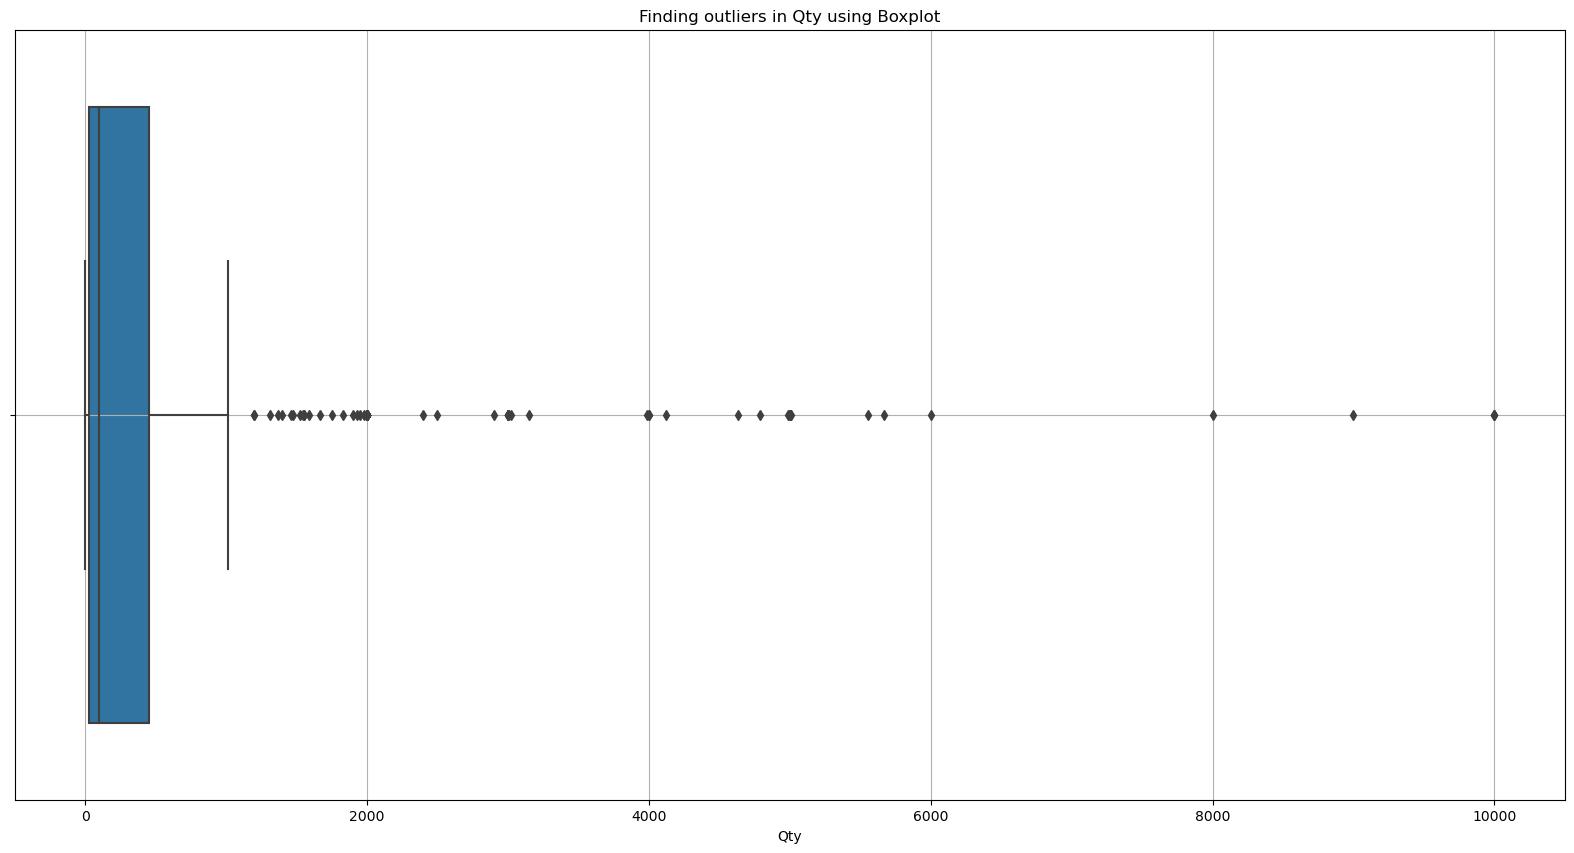

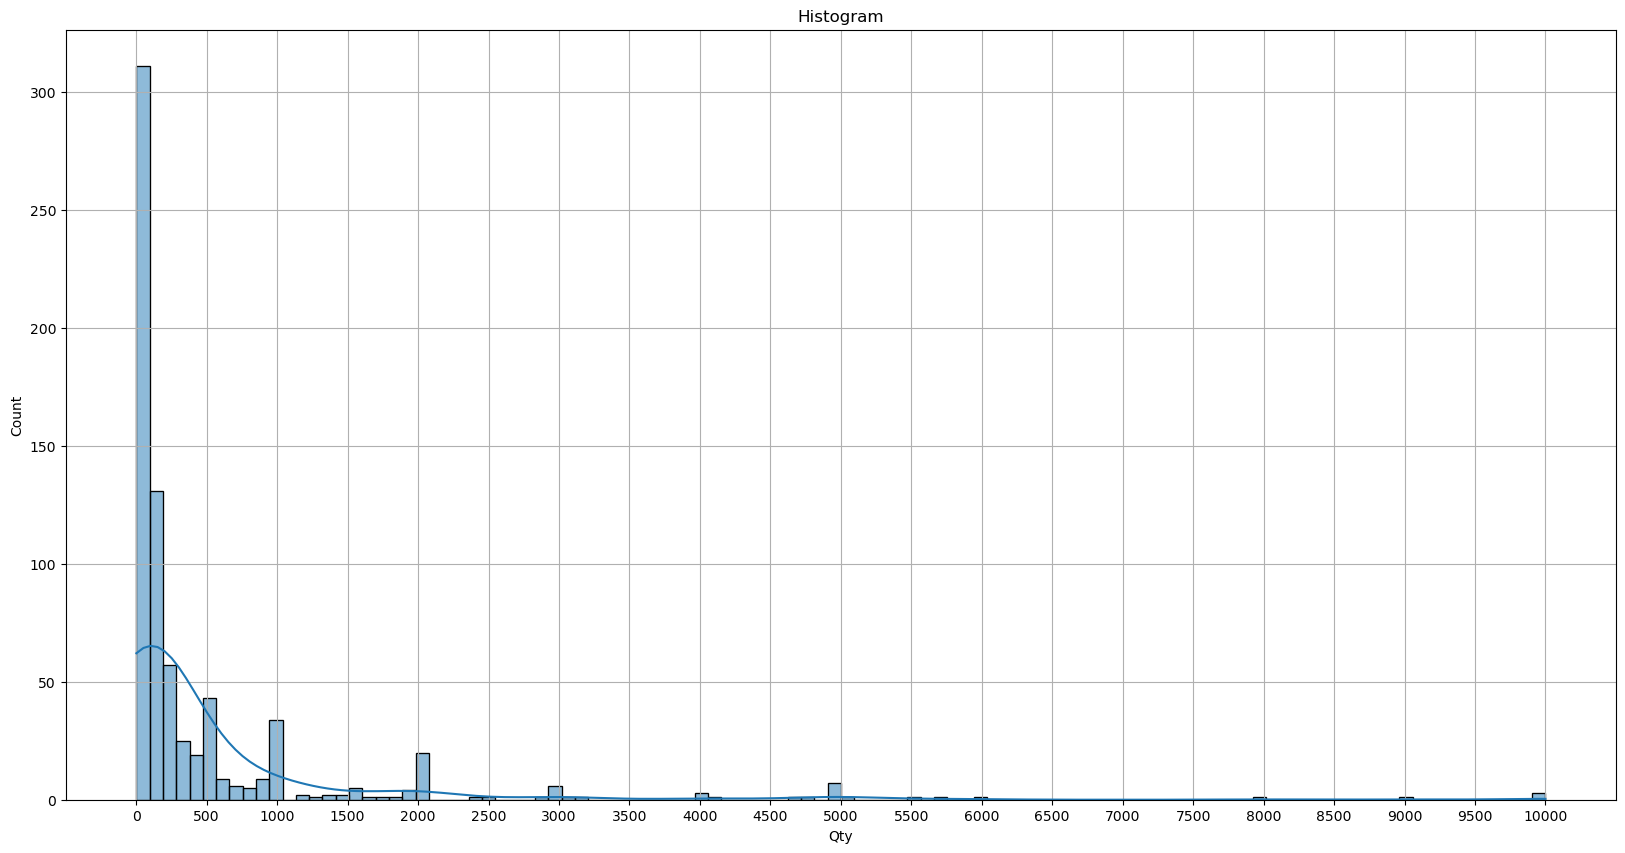

In [52]:
#Boxplot 
plt.figure(figsize=[20,10])
sns.boxplot(data=df,x='Qty')
plt.title('Finding outliers in Qty using Boxplot')
plt.grid()
plt.show()
#Histogram
plt.figure(figsize=[20,10])
sns.histplot(x=df.Qty,kde=True) #kde will draw the line
plt.title('Histogram')
plt.xticks(np.arange(0,10001,500))
plt.grid()
plt.show()

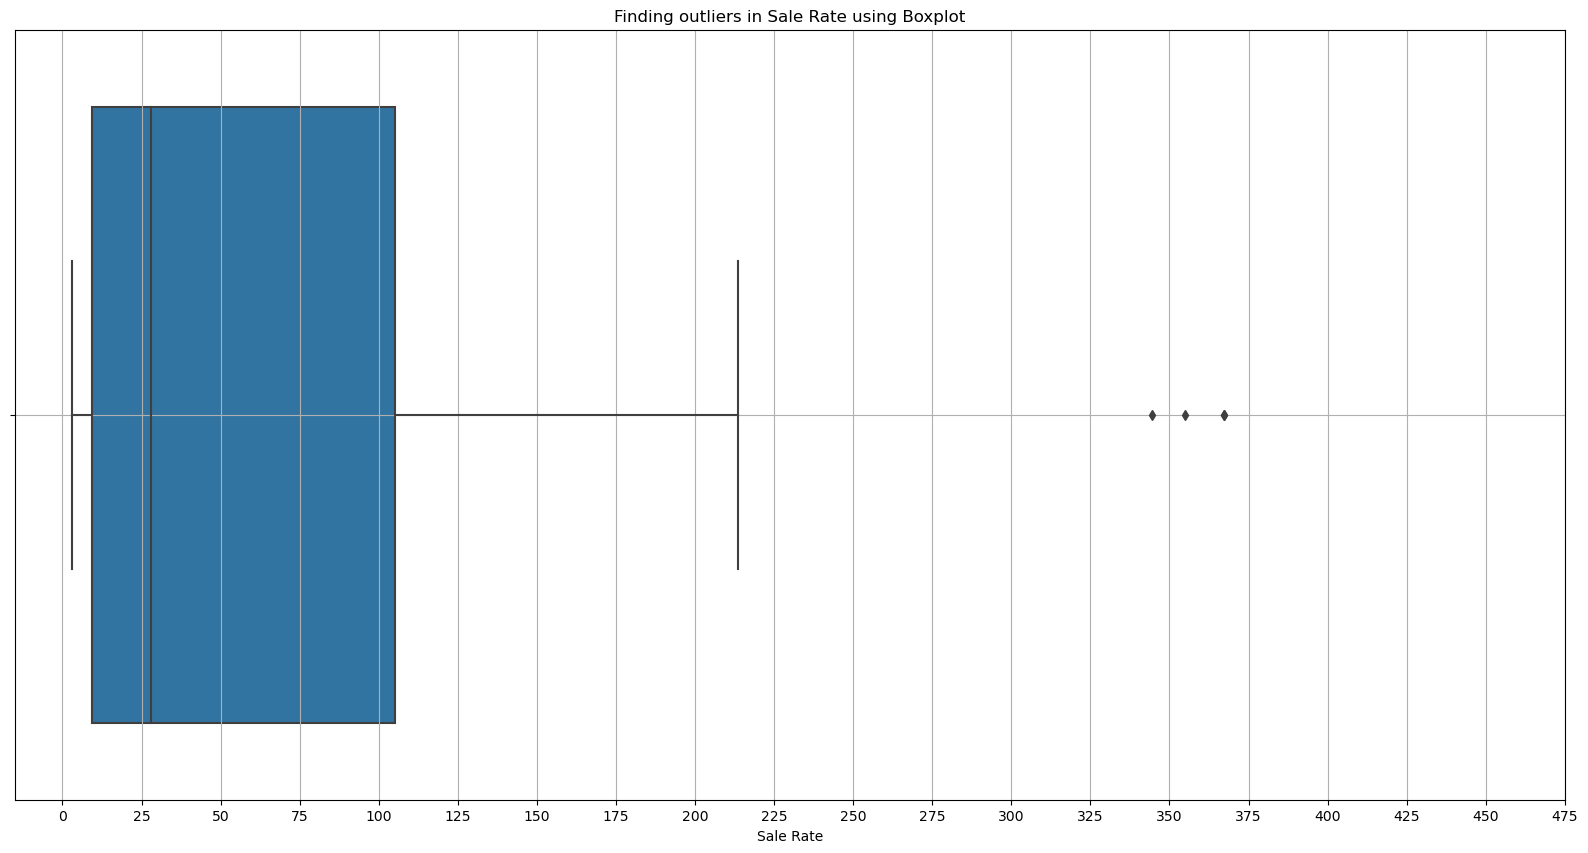

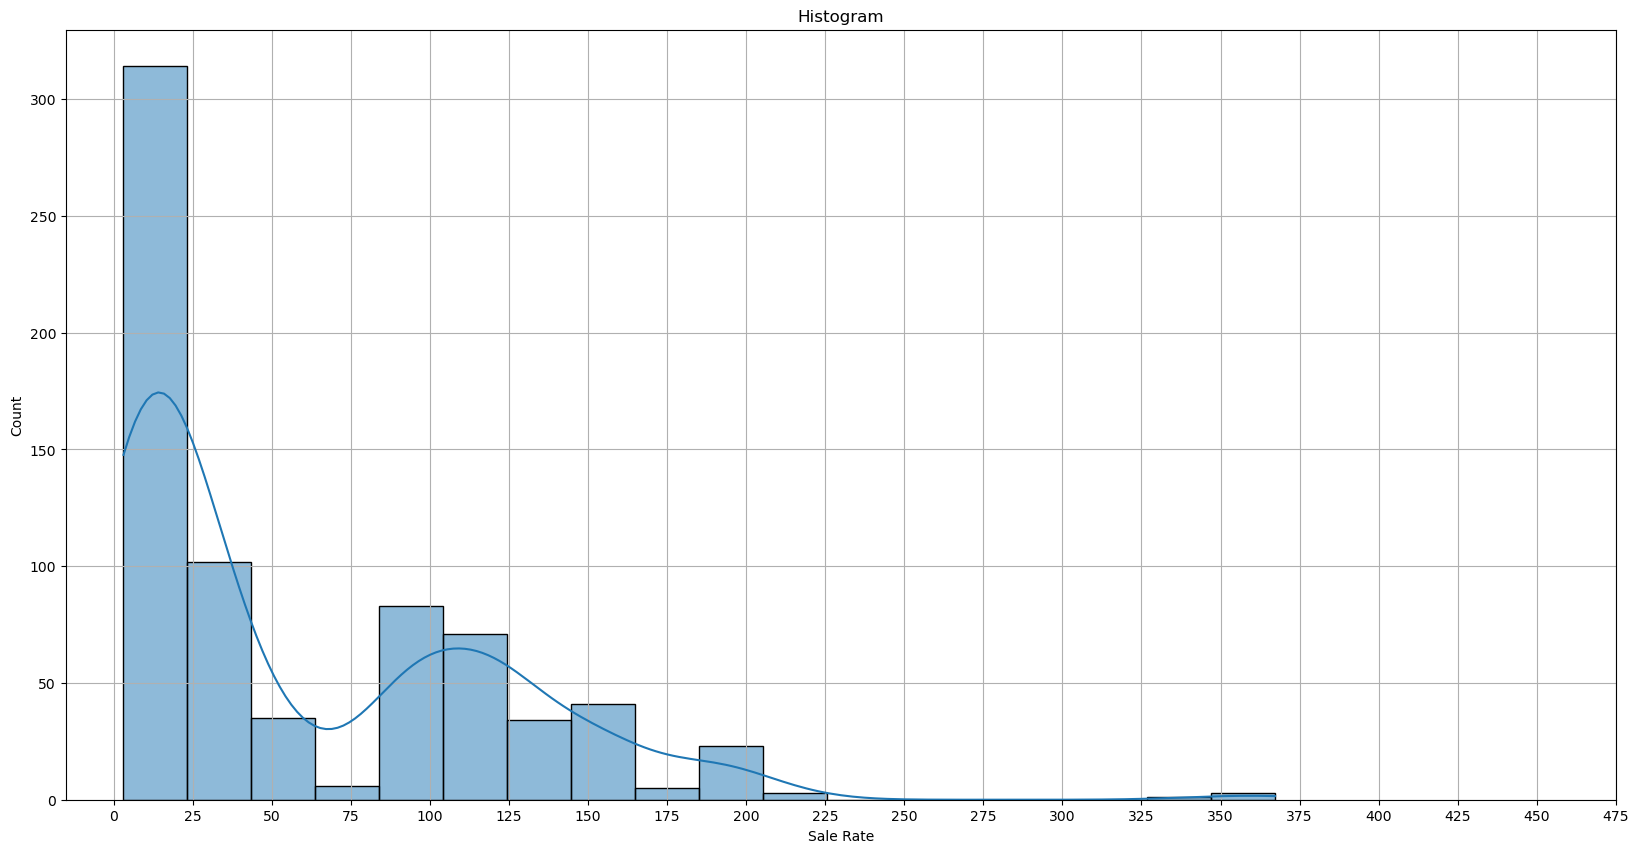

In [53]:
#Boxplot 
plt.figure(figsize=[20,10])
sns.boxplot(data=df,x='Sale Rate')
plt.title('Finding outliers in Sale Rate using Boxplot')
plt.xticks(np.arange(0,500,25))
plt.grid()
plt.show()
#Histogram
plt.figure(figsize=[20,10])
sns.histplot(x=df['Sale Rate'],kde=True) 
plt.title('Histogram')
plt.xticks(np.arange(0,500,25))
plt.grid()
plt.show()

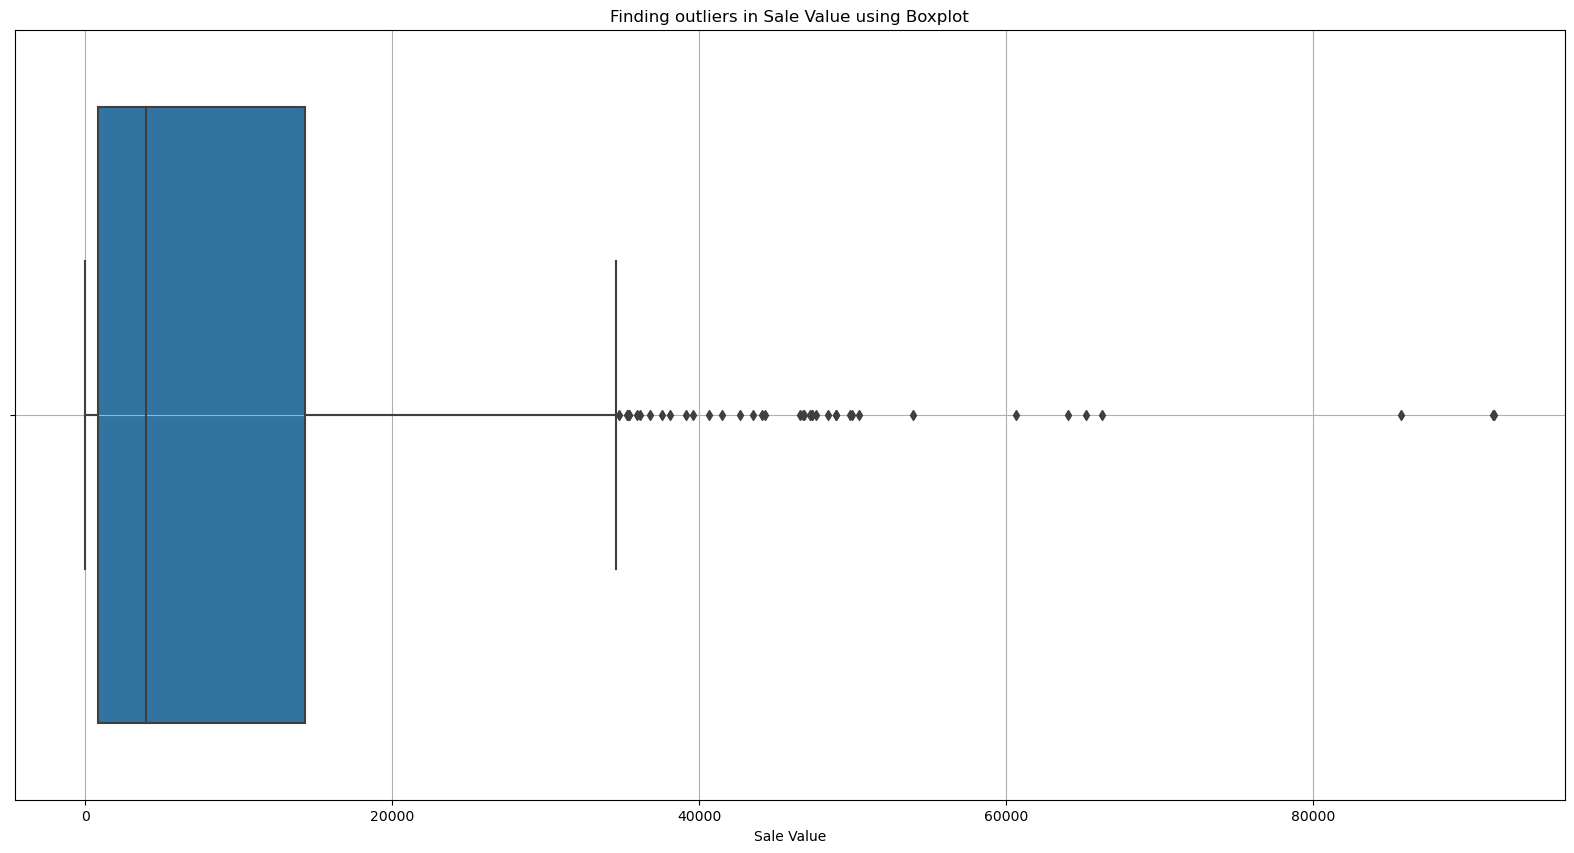

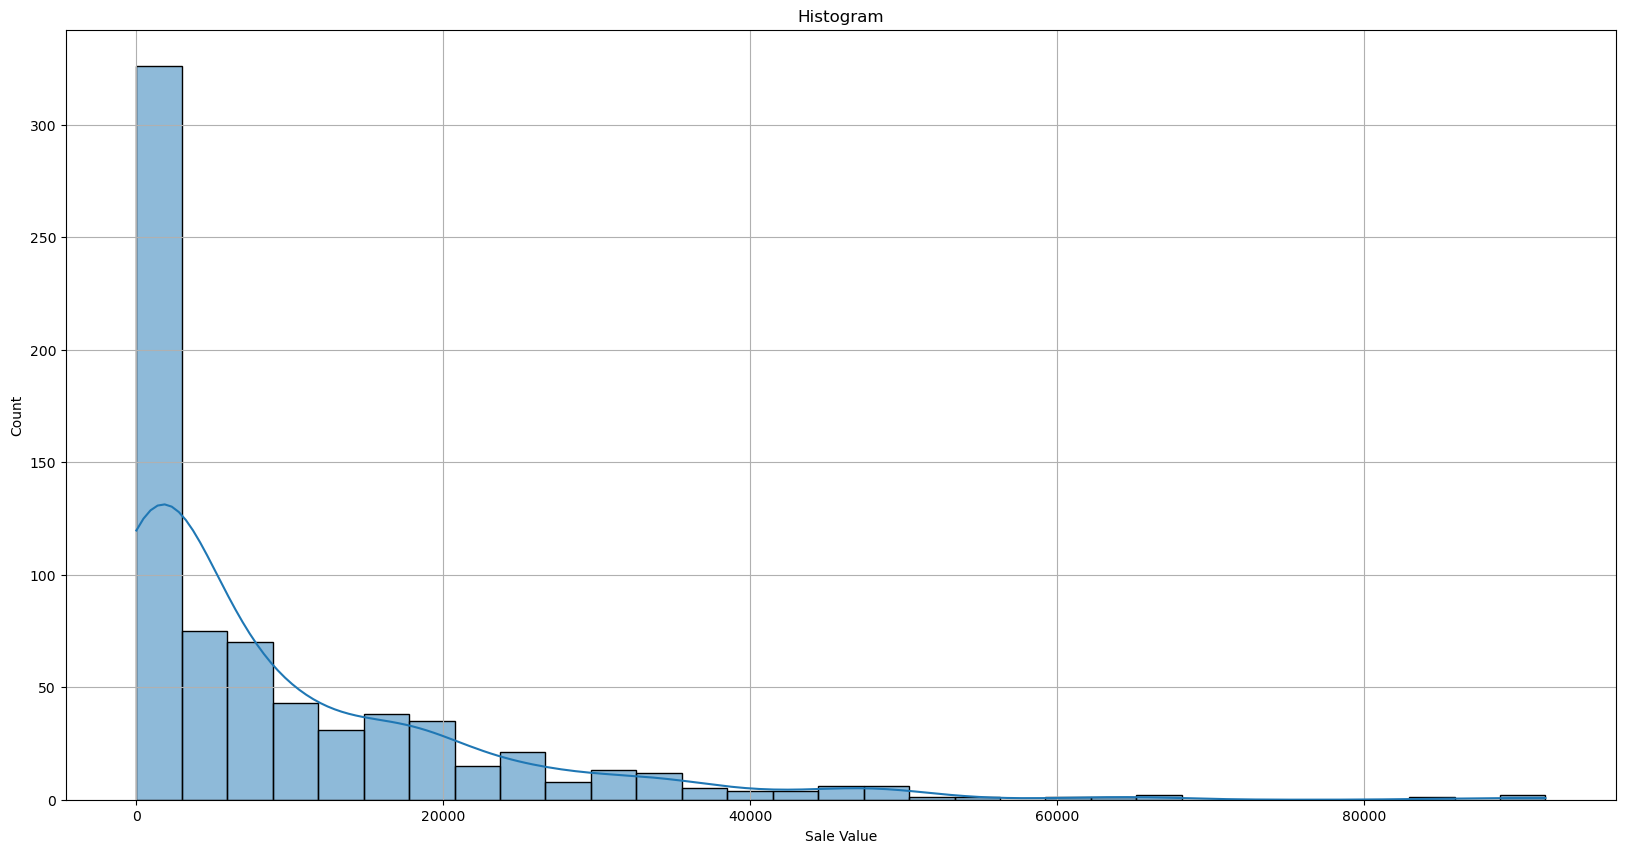

In [54]:
#Boxplot 
plt.figure(figsize=[20,10])
sns.boxplot(data=df,x='Sale Value')
plt.title('Finding outliers in Sale Value using Boxplot')
#plt.xticks(np.arange(0,500,25))
plt.grid()
plt.show()
#Histogram
plt.figure(figsize=[20,10])
sns.histplot(x=df['Sale Value'],kde=True) 
plt.title('Histogram')
#plt.xticks(np.arange(0,500,25))
plt.grid()
plt.show()

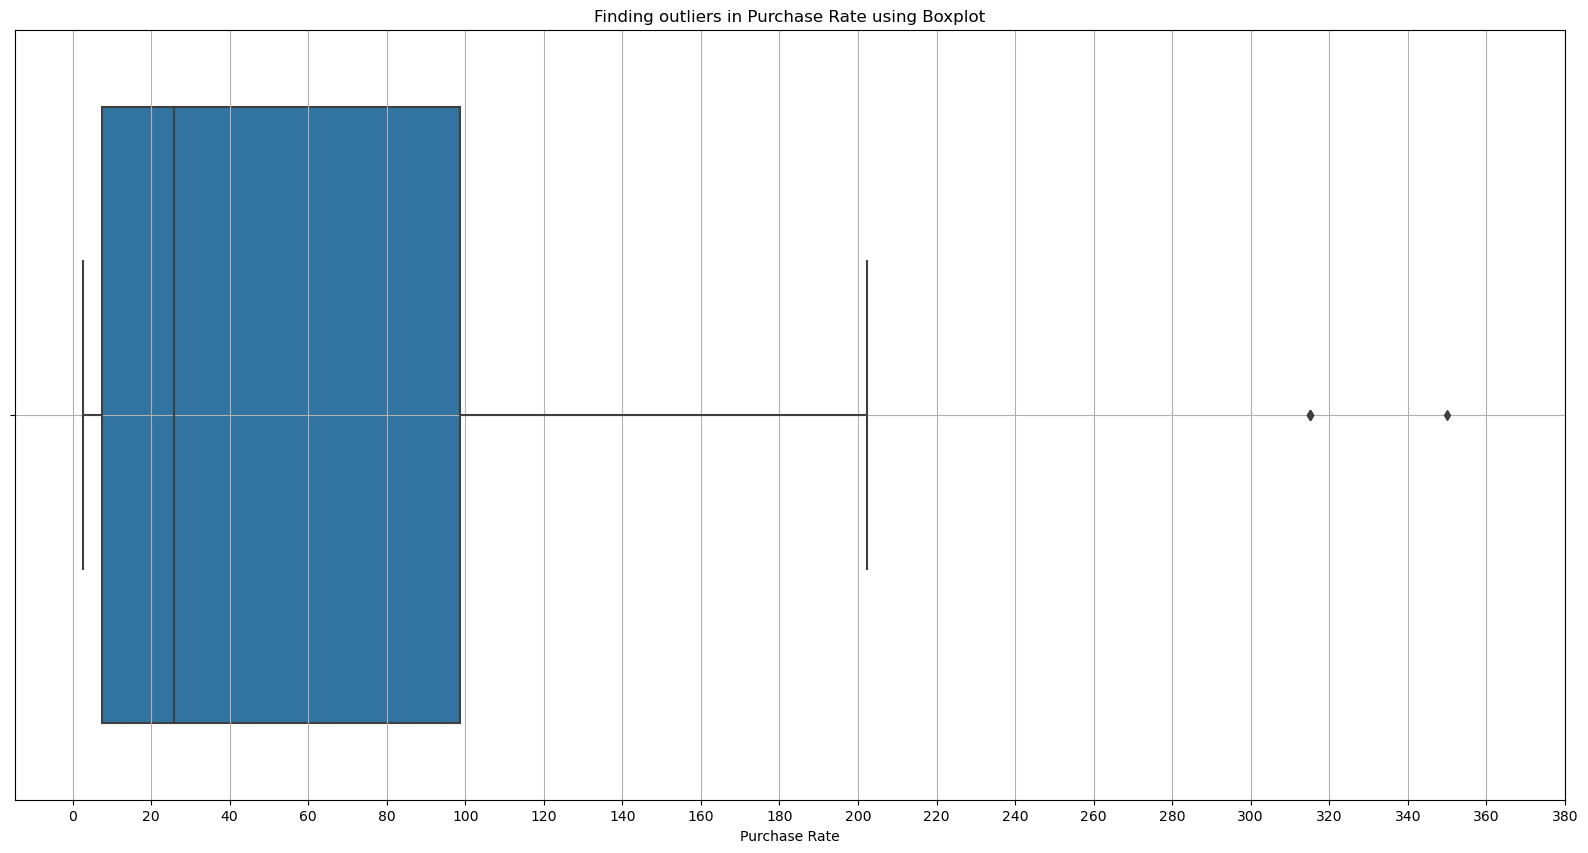

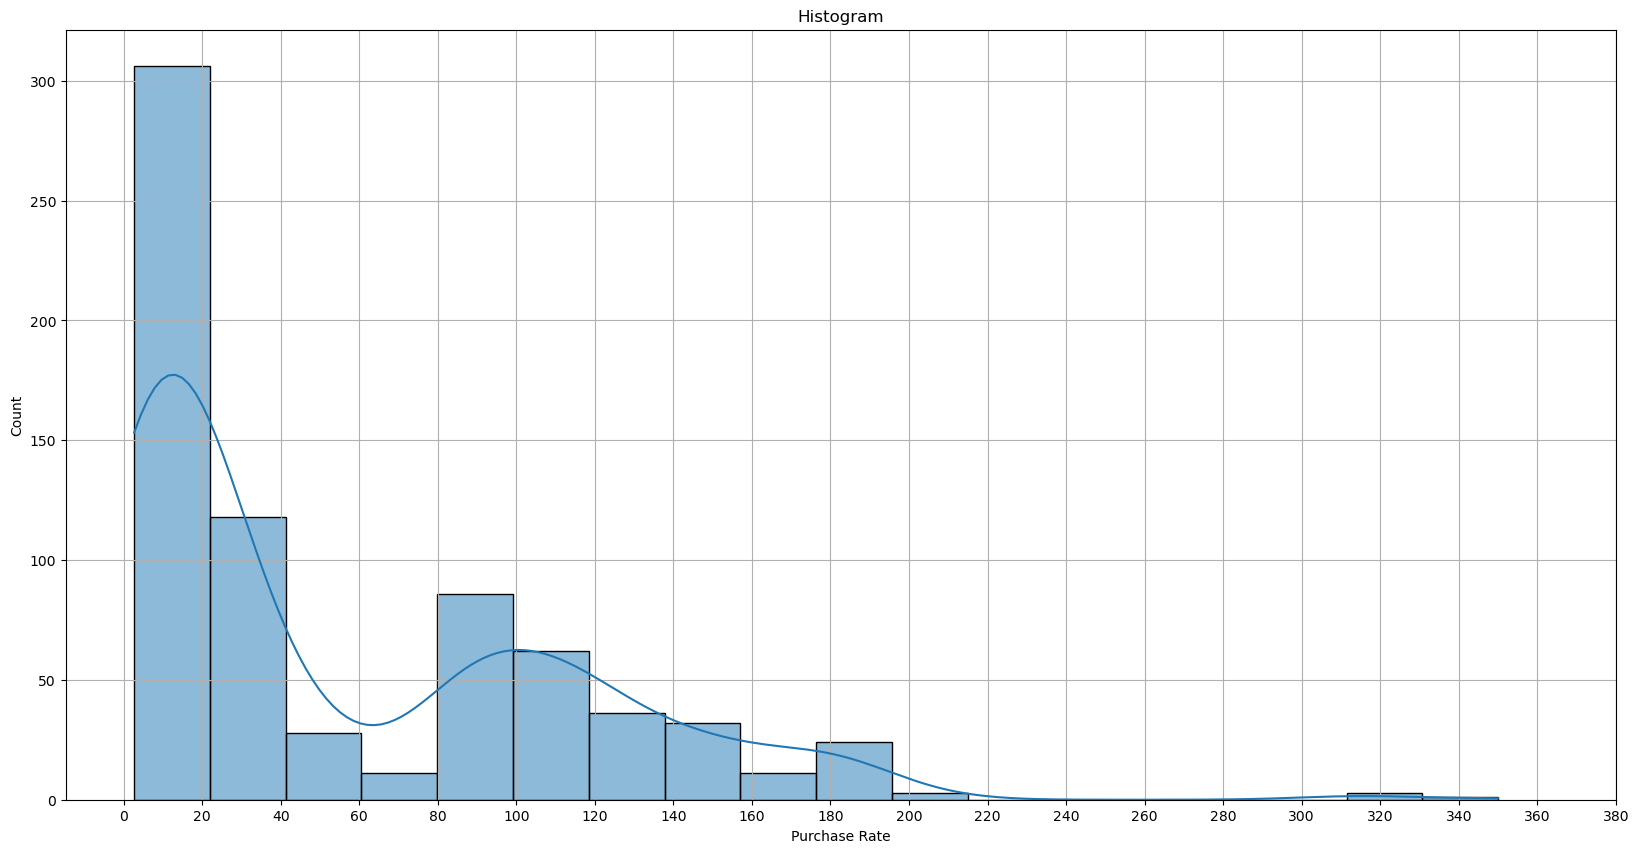

In [55]:
#Boxplot 
plt.figure(figsize=[20,10])
sns.boxplot(data=df,x='Purchase Rate')
plt.title('Finding outliers in Purchase Rate using Boxplot')
plt.xticks(np.arange(0,400,20))
plt.grid()
plt.show()
#Histogram
plt.figure(figsize=[20,10])
sns.histplot(x=df['Purchase Rate'],kde=True) 
plt.title('Histogram')
plt.xticks(np.arange(0,400,20))
plt.grid()
plt.show()

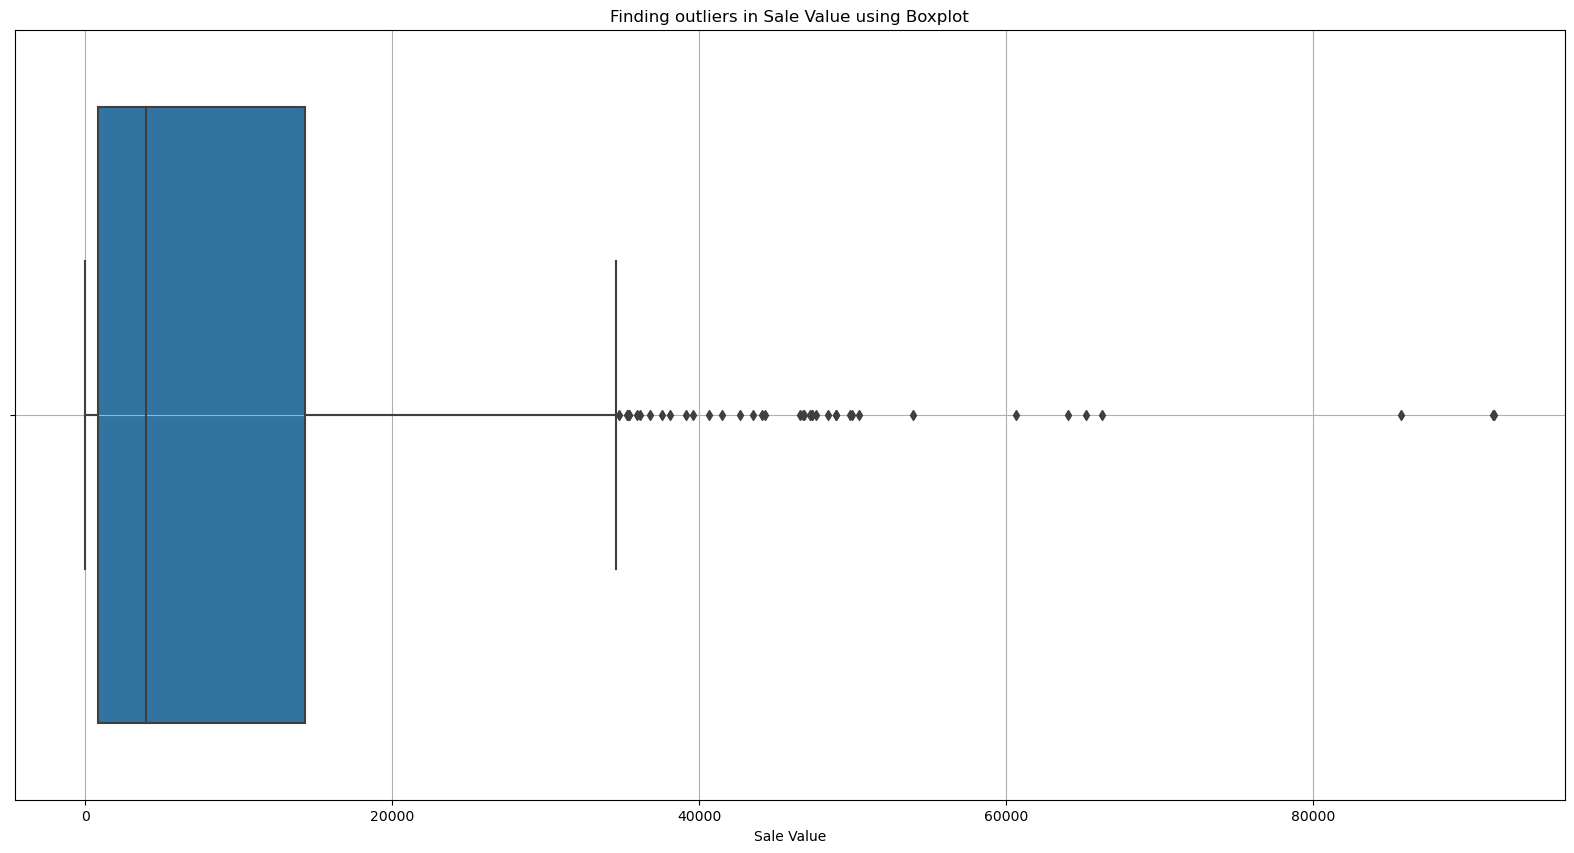

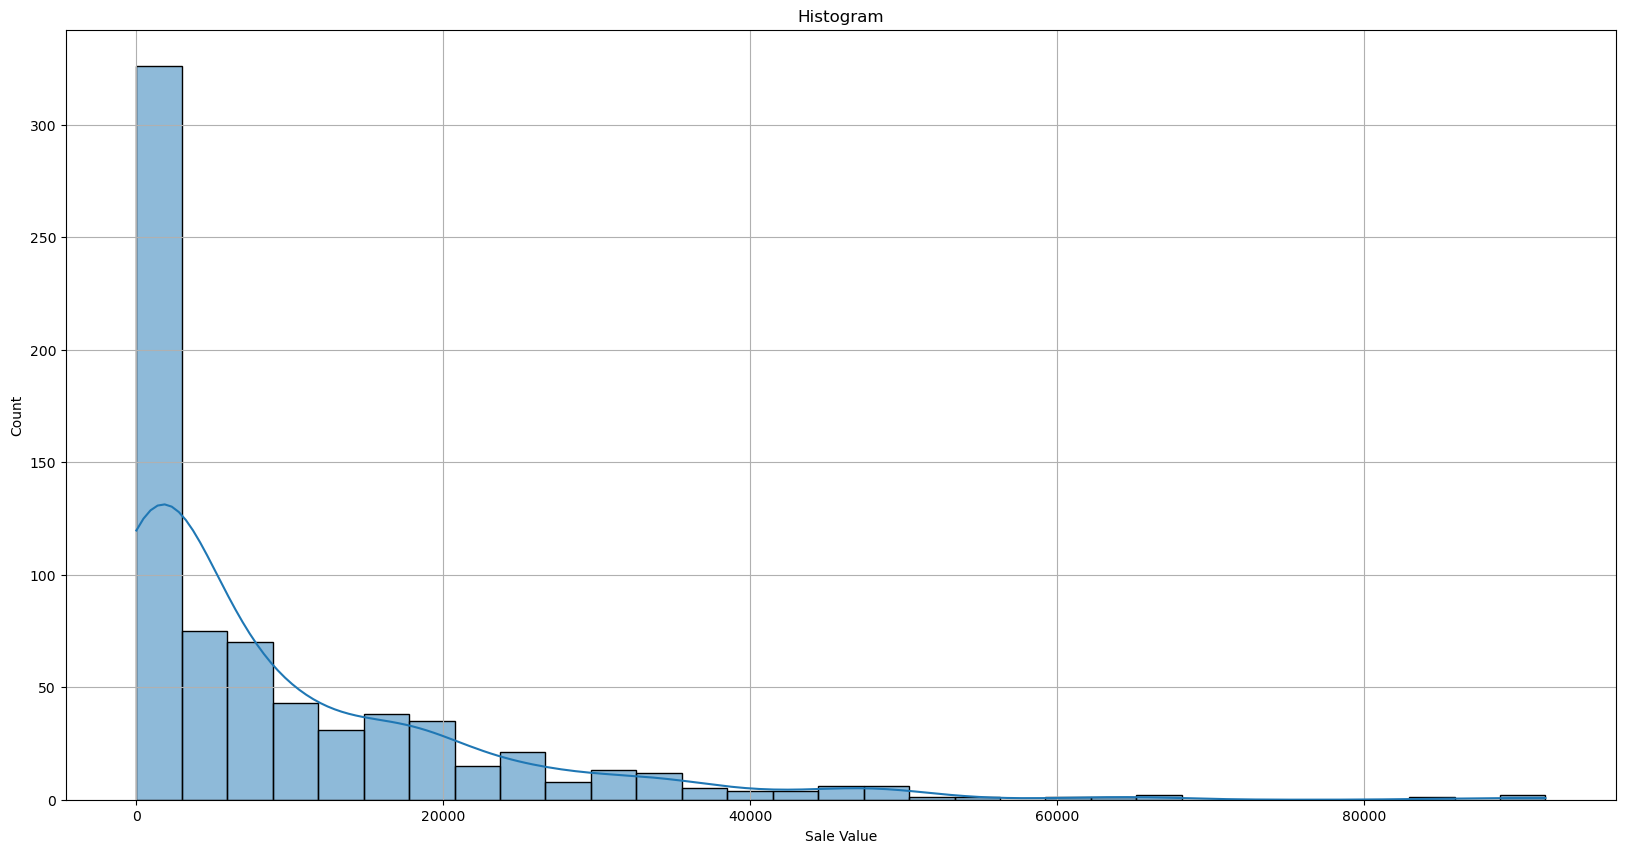

In [56]:
#Boxplot 
plt.figure(figsize=[20,10])
sns.boxplot(data=df,x='Sale Value')
plt.title('Finding outliers in Sale Value using Boxplot')
#plt.xticks(np.arange(0,500,25))
plt.grid()
plt.show()
#Histogram
plt.figure(figsize=[20,10])
sns.histplot(x=df['Sale Value'],kde=True) 
plt.title('Histogram')
#plt.xticks(np.arange(0,500,25))
plt.grid()
plt.show()

75th Percentile:  845.96


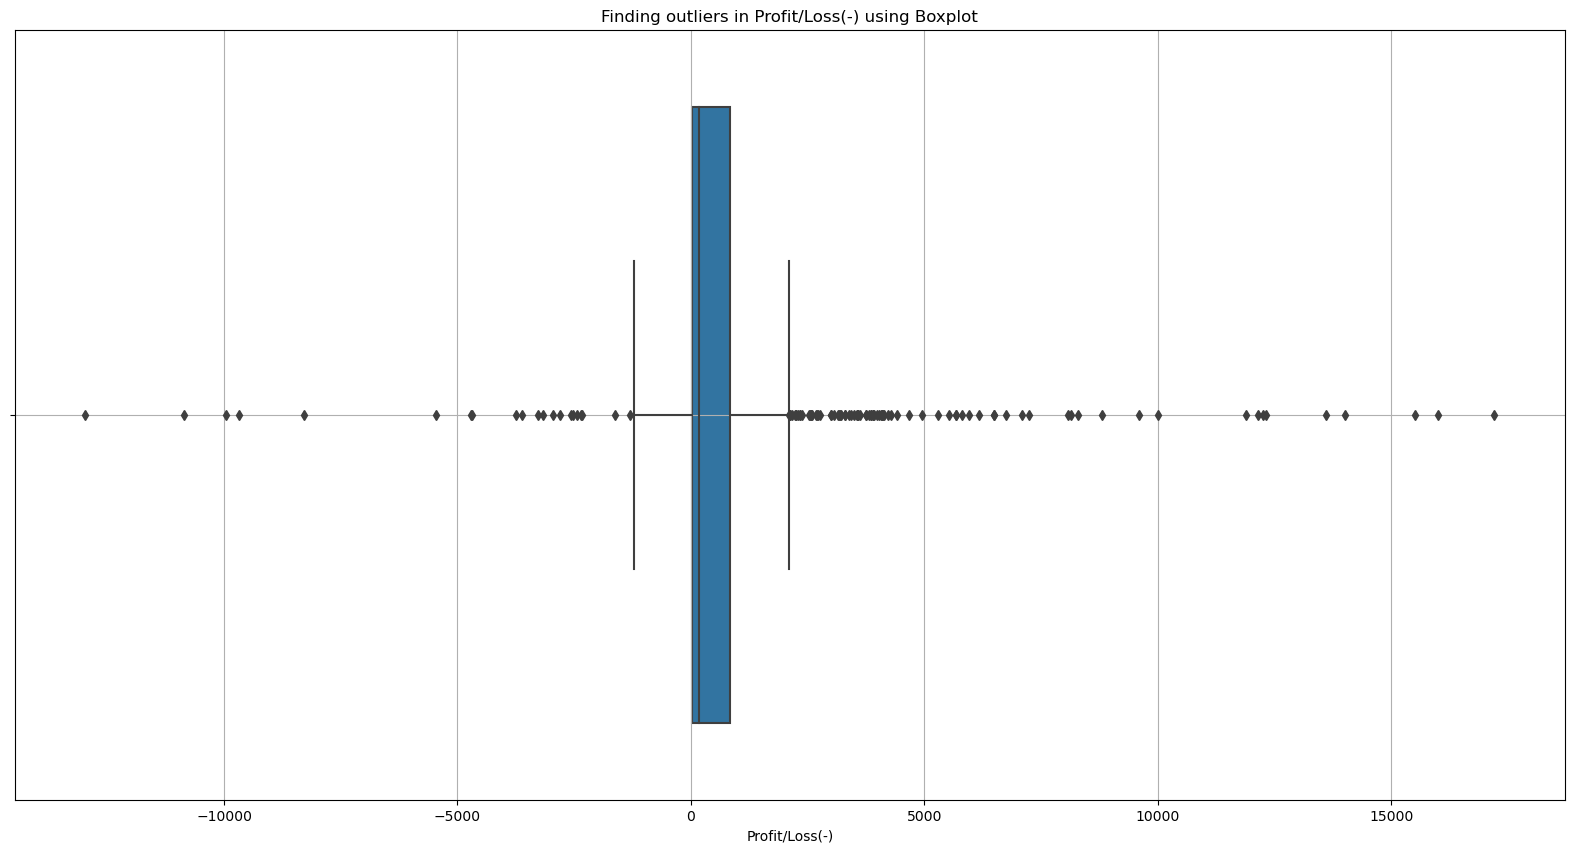

By looking at the chart it is clear that the density is more between the regions of 0 and 845


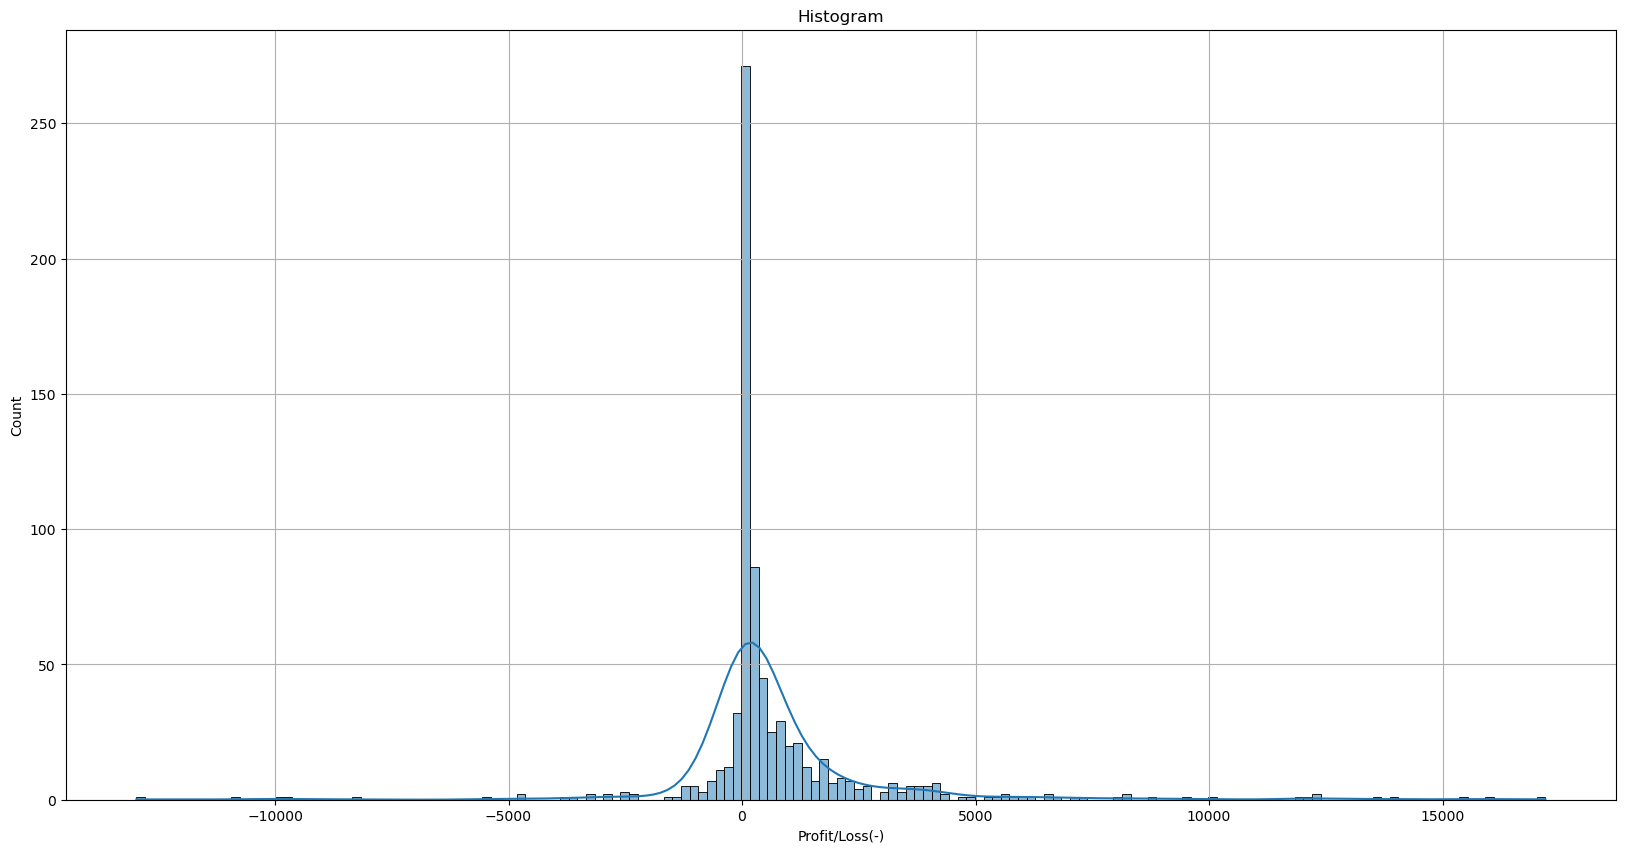

In [57]:
#Boxplot 
plt.figure(figsize=[20,10])
sns.boxplot(data=df,x='Profit/Loss(-)')
plt.title('Finding outliers in Profit/Loss(-) using Boxplot')
#plt.xticks(np.arange(0,500,25))
q3=np.percentile(df['Profit/Loss(-)'],75,interpolation='midpoint')
print('75th Percentile: ',q3)
plt.grid()
plt.show()
#Histogram
plt.figure(figsize=[20,10])
sns.histplot(x=df['Profit/Loss(-)'],kde=True) 
plt.title('Histogram')
#plt.xticks(np.arange(0,500,25))
print('By looking at the chart it is clear that the density is more between the regions of 0 and 845')
plt.grid()
plt.show()

### Filtering Profit outlier data

In [58]:
df.head()

,Stock Symbol,ISIN,Qty,Sale Date,Sale Rate,Sale Value,Purchase Date,Purchase Rate,Purchase Value,Profit/Loss(-)
0,BANBAR,INE028A01039,627.0,28-May-20,39.5,24692.80,28-May-20,38.95,24422.28,270.52
1,BANBAR,INE028A01039,189.0,28-May-20,39.5,7443.29,28-May-20,38.95,7361.74,81.55
2,BANBAR,INE028A01039,40.0,28-May-20,39.5,1575.30,28-May-20,38.95,1558.04,17.26
3,BANBAR,INE028A01039,142.0,28-May-20,39.5,5592.31,28-May-20,38.95,5531.04,61.27
4,BANBAR,INE028A01039,1.0,28-May-20,39.5,29.93,28-May-20,38.95,38.95,-9.02


In [59]:
df.loc[df['Profit/Loss(-)']>0]

,Stock Symbol,ISIN,Qty,Sale Date,Sale Rate,Sale Value,Purchase Date,Purchase Rate,Purchase Value,Profit/Loss(-)
0,BANBAR,INE028A01039,627.0,28-May-20,39.50,24692.80,28-May-20,38.95,24422.28,270.52
1,BANBAR,INE028A01039,189.0,28-May-20,39.50,7443.29,28-May-20,38.95,7361.74,81.55
2,BANBAR,INE028A01039,40.0,28-May-20,39.50,1575.30,28-May-20,38.95,1558.04,17.26
3,BANBAR,INE028A01039,142.0,28-May-20,39.50,5592.31,28-May-20,38.95,5531.04,61.27
5,BANBAR,INE028A01039,1.0,28-May-20,39.50,39.38,28-May-20,38.95,38.95,0.43
...,...,...,...,...,...,...,...,...,...,...
717,YESBAN,INE528G01035,2.0,31-Dec-20,17.77,35.43,25-Nov-20,14.15,28.39,7.04
718,YESBAN,INE528G01035,10.0,31-Dec-20,17.77,177.17,25-Nov-20,14.15,141.94,35.23
719,ZEEENT,INE256A01028,100.0,1-Mar-21,213.50,21286.15,26-Feb-21,202.25,20285.49,1000.66
720,ZEEENT,INE256A01028,57.0,1-Mar-21,213.50,12133.10,26-Feb-21,200.55,11468.96,664.14


In [60]:
q1=np.percentile(df['Profit/Loss(-)'],25,interpolation='midpoint')
print('q1 : ',q1)
iqr=(q3-q1)
print('iqr :',iqr)
upperlimit=q3+(1.5*iqr)
print('upperlimit :',upperlimit)
lowerlimit=q1-(1.5*iqr)
print('lowerlimit :',lowerlimit)

q1 :  12.85
iqr : 833.11
upperlimit : 2095.625
lowerlimit : -1236.815


In [61]:
df.loc[df['Profit/Loss(-)']>upperlimit]

,Stock Symbol,ISIN,Qty,Sale Date,Sale Rate,Sale Value,Purchase Date,Purchase Rate,Purchase Value,Profit/Loss(-)
86,ASHLEY,INE208A01029,500.0,13-Aug-20,61.15,30483.56,31-Jul-20,48.50,24326.53,6157.03
89,BANBAR,INE028A01039,1000.0,19-Jun-20,47.00,46859.44,18-May-20,38.60,38714.87,8144.57
90,BANIND,INE084A01016,500.0,15-Jun-20,42.40,21136.60,22-Apr-20,34.00,17051.64,4084.96
158,CHEPET,INE178A01016,200.0,2-Dec-20,90.50,18045.87,24-Sep-20,67.95,13632.65,4413.22
163,CHEPET,INE178A01016,599.0,14-Dec-20,107.20,64020.75,25-Nov-20,86.35,51888.16,12132.59
...,...,...,...,...,...,...,...,...,...,...
634,YESBAN,INE528G01035,4000.0,20-Aug-20,16.35,65204.41,24-Jul-20,12.00,48000.00,17204.41
670,YESBAN,INE528G01035,1000.0,31-Dec-20,17.77,17717.00,14-Aug-20,15.10,15147.43,2569.57
696,YESBAN,INE528G01035,2000.0,31-Dec-20,17.77,35434.00,1-Sep-20,14.05,28188.25,7245.75
701,YESBAN,INE528G01035,1000.0,31-Dec-20,17.77,17717.00,1-Sep-20,14.05,14094.13,3622.87


In [62]:
df.loc[df['Profit/Loss(-)']<lowerlimit]

,Stock Symbol,ISIN,Qty,Sale Date,Sale Rate,Sale Value,Purchase Date,Purchase Rate,Purchase Value,Profit/Loss(-)
70,ASHLEY,INE208A01029,500.0,6-Jul-20,50.50,25174.49,24-Jun-20,55.80,27983.44,-2808.95
71,ASHLEY,INE208A01029,500.0,6-Jul-20,50.50,25174.49,24-Jun-20,56.10,28133.89,-2959.40
72,ASHLEY,INE208A01029,400.0,6-Jul-20,50.50,20139.59,24-Jun-20,54.25,21764.90,-1625.31
87,BANBAR,INE028A01039,941.0,5-Jun-20,44.20,41467.81,24-Apr-20,47.30,44641.76,-3173.95
459,STABAN,INE062A01020,125.0,26-May-20,153.00,19065.74,24-Apr-20,181.95,22811.43,-3745.69
461,STABAN,INE062A01020,175.0,26-May-20,151.75,26477.22,24-Apr-20,181.95,31936.01,-5458.79
462,STABAN,INE062A01020,75.0,26-May-20,153.00,11439.45,21-Apr-20,183.00,13765.84,-2326.39
464,STABAN,INE062A01020,175.0,27-May-20,154.35,26930.86,24-Apr-20,180.20,31628.85,-4697.99
586,UNIPLY,INE950G01023,1010.0,17-Nov-20,3.79,3812.09,24-Jun-20,6.25,6331.38,-2519.29
587,UNIPLY,INE950G01023,968.0,17-Nov-20,3.79,3653.57,24-Jun-20,6.20,6019.55,-2365.98


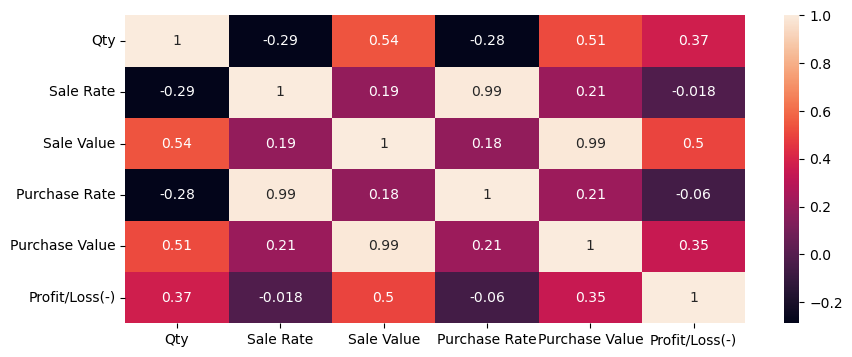

In [63]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Stocks invested

In [64]:
df['Stock Symbol'].value_counts()

YESBAN    128
SOUBAN     95
CHEALK     87
UNIPLY     84
KARVYS     60
STABAN     47
RELDEF     32
INDOIL     29
RBLBAN     28
ASHLEY     17
TAMNEW     17
BANBAR     13
NTPC       11
CITUNI     10
CHEPET      9
POWTRA      8
ONGC        7
TATMOT      6
INDIBA      6
NATALU      4
PUNBAN      4
UNIP        3
ZEEENT      3
BANIND      3
LAKVIL      2
GAIL        2
COALIN      2
FEDBAN      2
ITC         1
INDBA       1
Name: Stock Symbol, dtype: int64

### Total quantity of each stock

In [65]:
stock_totals=pd.DataFrame(df.Qty.groupby(df['Stock Symbol']).sum())

In [66]:
stock_totals=stock_totals.sort_values(by='Qty',ascending=False)
stock_totals

,Qty
Stock Symbol,
SOUBAN,125999.0
UNIPLY,76557.0
RELDEF,54999.0
YESBAN,50099.0
KARVYS,8500.0
ASHLEY,6800.0
INDOIL,4999.0
STABAN,4325.0
BANBAR,3600.0


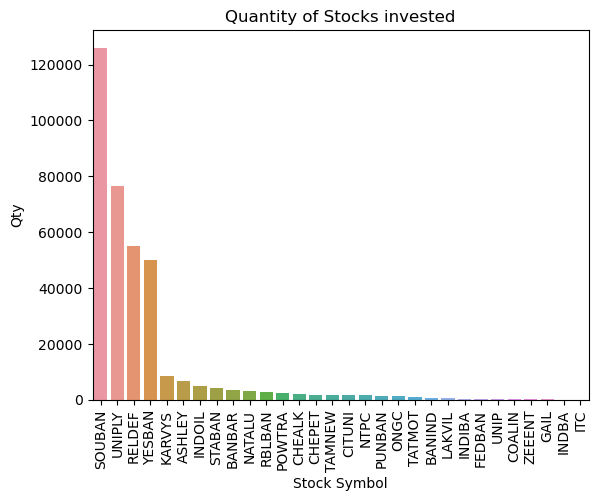

In [67]:
#plt.figure(figsize=[20,10])
sns.barplot(stock_totals.index,stock_totals['Qty'])
plt.xticks(rotation=90)
plt.title('Quantity of Stocks invested')
plt.show()


### Purchase Value of each stock

In [86]:
purchase_val=df['Purchase Value'].groupby(df['Stock Symbol']).sum().sort_values(ascending=False)
purchase_val=pd.DataFrame(purchase_val)
purchase_val

,Purchase Value
Stock Symbol,
YESBAN,878462.01
SOUBAN,873951.80
STABAN,756114.73
UNIPLY,445257.84
INDOIL,420121.90
ASHLEY,356604.00
RBLBAN,318352.62
CHEALK,286307.74
KARVYS,245779.20


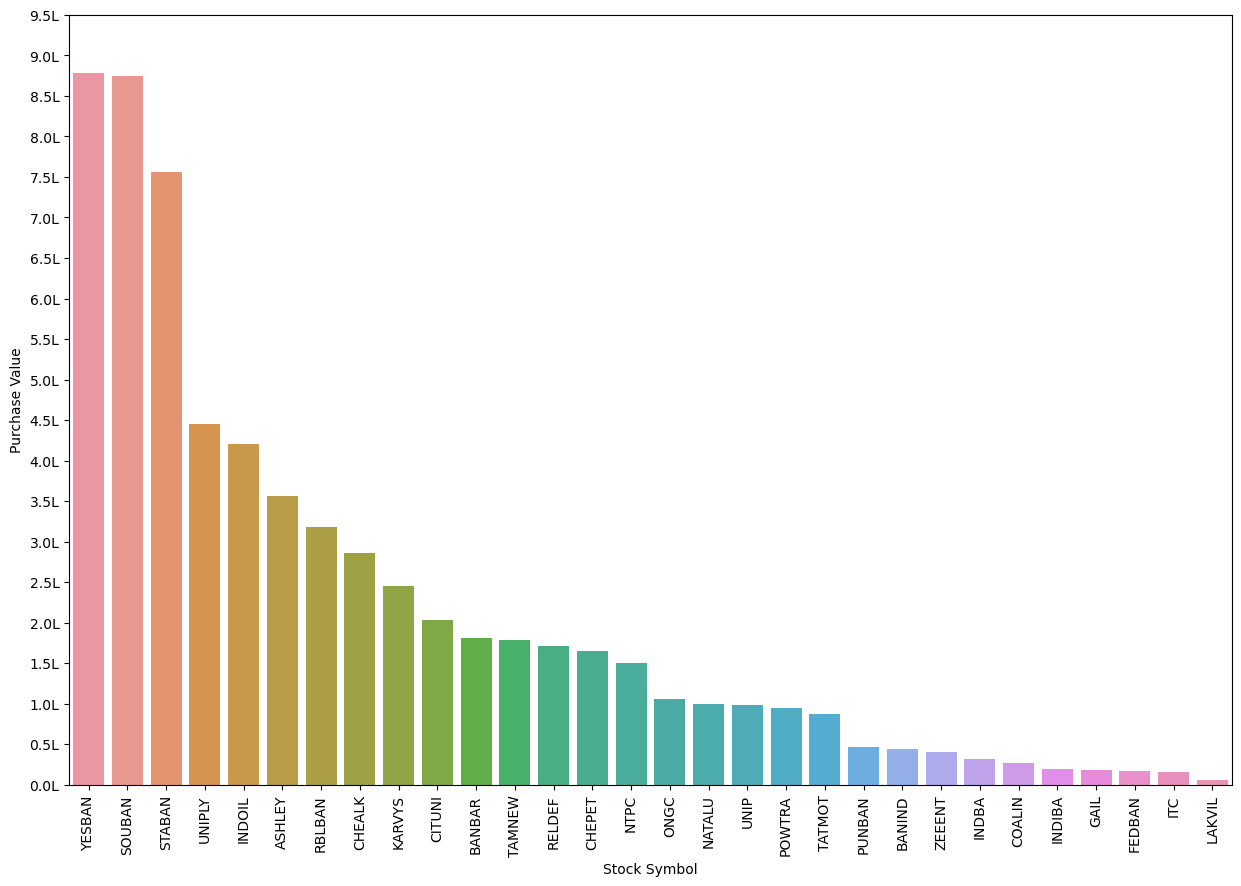

In [87]:
plt.figure(figsize=[15,10])
sns.barplot(purchase_val.index,purchase_val['Purchase Value'])
plt.xticks(rotation=90)
ticks=np.arange(0,1000000,50000)
label=['{}L'.format(i/100000)for i in ticks]
plt.yticks(ticks,label)
plt.show()

### Overall Purchase Value 

In [70]:
total_purval=round(purchase_val['Purchase Value'].sum(),2)
total_purval

6385724.31

### Sale Value of each stock

In [71]:
Sale_val=df['Sale Value'].groupby(df['Stock Symbol']).sum().sort_values(ascending=False)
Sale_val=pd.DataFrame(Sale_val)
Sale_val

,Sale Value
Stock Symbol,
SOUBAN,1076231.94
YESBAN,937453.57
STABAN,764349.03
INDOIL,456351.07
UNIPLY,444532.28
ASHLEY,353504.61
RBLBAN,336792.15
CHEALK,293494.10
KARVYS,280659.17


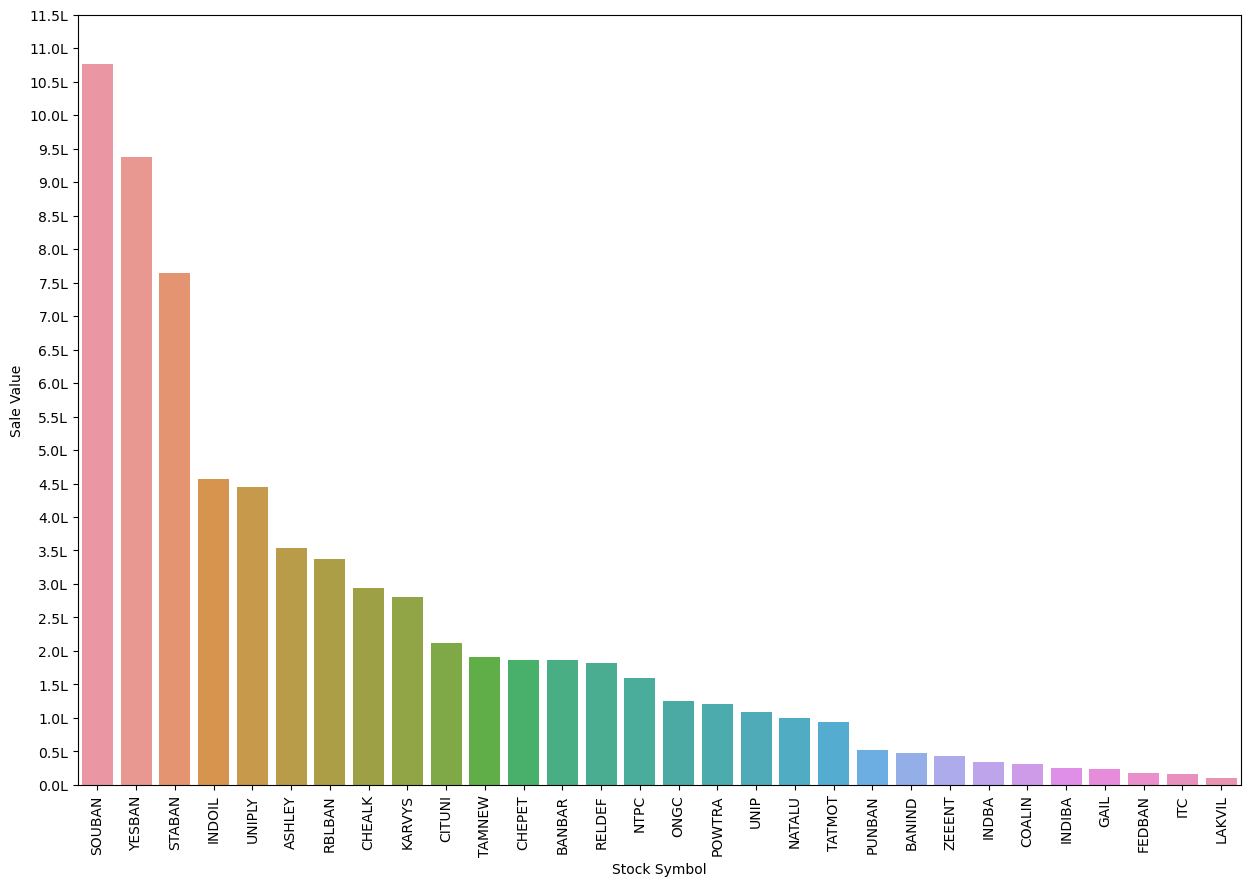

In [72]:
plt.figure(figsize=[15,10])
sns.barplot(Sale_val.index,Sale_val['Sale Value'])
plt.xticks(rotation=90)
ticks=np.arange(0,1200000,50000)
label=['{}L'.format(i/100000)for i in ticks]
plt.yticks(ticks,label)
plt.show()

### Overall Sale Value 

In [73]:
total_saleval=round(Sale_val['Sale Value'].sum(),2)
total_saleval

6909375.1

### Overall Profit/Loss

In [74]:
gain_or_loss=round(total_saleval-total_purval,2)
gain_or_loss

523650.79

### Profit and loss of each share

In [114]:
profloss=Sale_val['Sale Value']-purchase_val['Purchase Value']
profloss=pd.DataFrame(profloss)
profloss.rename(columns={0:'Profit/Loss'},inplace=True)
profloss.sort_values(by=['Profit/Loss'],ascending=False,inplace=True)
profloss

,Profit/Loss
Stock Symbol,
SOUBAN,202280.14
YESBAN,58991.56
INDOIL,36229.17
KARVYS,34879.97
POWTRA,26344.95
CHEPET,21409.77
ONGC,19393.08
RBLBAN,18439.53
TAMNEW,11765.82


### Inferences:
From the above data we can conclude that if we invest or buy more stocks in a growing company(based on studies), we can gain more profit

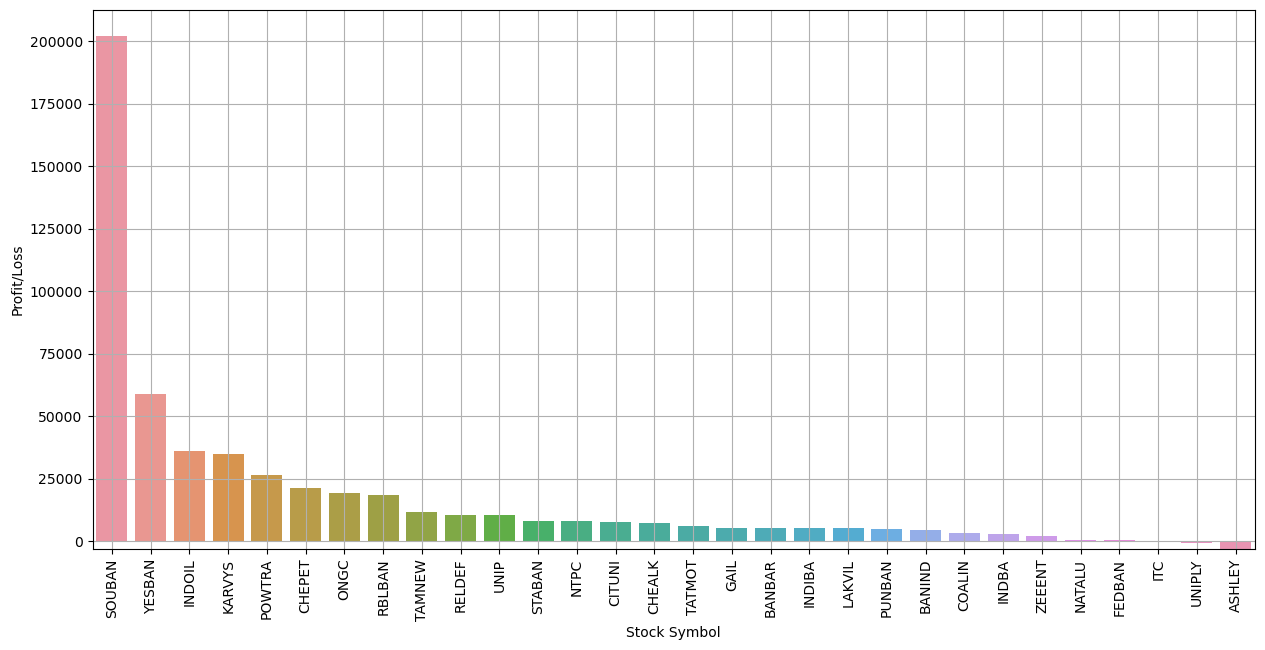

In [115]:
plt.figure(figsize=[15,7])
sns.barplot(profloss.index,profloss['Profit/Loss'])
plt.xticks(rotation=90)
plt.ylim(min(profloss['Profit/Loss'])),(max(profloss['Profit/Loss']))
plt.grid()
plt.show()